# Lab Assignment 2 - Anastasia Jeffcoat

## 200003415

##### https://github.com/ajeffcoat216/PY4SA23_Assignment.git

### If...else statements

#### Question 1
##### Is a number divisible by 3?

In [1]:
x = 873
if x%3 == 0 :
    print(str(x) + " is divisible by 3.")
else: 
    print(str(x) + " is not divisible by 3.")
    
y = 659
if y%3 == 0:
    print(str(y) + " is divisible by 3.")
else:
    print(str(y) + " is not divisible by 3.")

873 is divisible by 3.
659 is not divisible by 3.


#### Question 2
##### Is a fruit acceptable?

In [2]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
if 'apple' in fruits:
    print("Apple is acceptable.")
else:
    print("Apple is not acceptable.")
if 'banana' in fruits:
    print("Banana is accetable.")
else:
    print("Banana is not accetable.")

Apple is acceptable.
Banana is not accetable.


#### Question 3
##### How far apart are two co-ordinates?

In [3]:
from haversine import haversine, Unit
#my home town to St. Andrews
#lat, long
#answer will be in km
bedworth = (52.4814, 1.4689)
standrews = (56.3398, 2.7967)
haversine(bedworth, standrews)

437.5327443711939

### Pandas and NumPy

In [167]:
import numpy as np
import pandas as pd
ppt = pd.read_csv("portland_park_trees.csv", sep=",", header=0, encoding="ISO-8859-1")

In [163]:
#how many data points are we working with?
print(len(ppt))

25534


#### Question 1
##### How many trees are of the Quercus or Acer genus?

In [45]:
qanda = ppt[(ppt["Genus"]=="Quercus") + (ppt["Genus"]=="Acer")]
print(len(qanda))

5675


#### Question 2
##### How many trees are of the Quercus or Acer genus, and have a DBH larger than 50 inches?

In [50]:
qadbh50 = ppt[(ppt["Genus"]=="Quercus") + (ppt["Genus"]=="Acer") & (ppt["DBH"]>50)]
print(len(qadbh50))

124


#### Question 3
##### Which genus has the highest mean DBH of the following genera: Quercus, Acer or Fraxinus?

In [103]:
quercus = ppt[ppt["Genus"]=="Quercus"]
acer = ppt[ppt["Genus"]=="Acer"]
fraxinus = ppt[ppt["Genus"]=="Fraxinus"]
quercusdbhm = quercus["DBH"].mean()
acerdbhm = acer["DBH"].mean()
fraxinusdbhm = fraxinus["DBH"].mean()
if quercusdbhm > acerdbhm and quercusdbhm > fraxinusdbhm:
    print (str("The genus Quercus has the highest mean DBH."))
elif acerdbhm > quercusdbhm and fraxinusdbhm:
    print(str("The genus Acer has the highest mean DBH."))
else:
    print (str("The genus Fraxinus has the highest mean DBH."))

print(f"The Quercus DBH is: {quercusdbhm}")
print(f"The Acer DBH is: {acerdbhm}")
print(f"The Fraxinus DBH is: {fraxinusdbhm}")



The genus Quercus has the highest mean DBH.
The Quercus DBH is: 23.56823839157492
The Acer DBH is: 18.419085331846066
The Fraxinus DBH is: 11.033609693877551


#### Question 4
##### How many different species of trees are recorded in the Acer genus?

In [161]:
acercount = acer["Species"].count()
acer.groupby("Species")["Genus"].count()
acerspecies = pd.DataFrame()
acerspecies["Count"] = acer.groupby("Species")['Genus'].count()
rows_count = len(acerspecies.index)
print (f"The Acer genus has {rows_count} different species.")

The Acer genus has 20 different species.


In [173]:
wc = pd.read_csv("world_cities.csv", sep=",", header=0, encoding="ISO-8859-1")
wc.columns =[column.replace(" ", "_") for column in wc.columns]
wc["pop_m"] = wc["pop"] / 1000000
del wc['pop']
wc.head()

,city,country,lat,lon,capital,pop_m
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


#### Question 5

In this first cell I import the .csv file and create a new column for population, in the millions. I then delete the original column for population.


Now I will subset the world cities according to 'A Coruna', the first city that starts with 'A', like my first name, 'Anastasia'>

In [175]:
acities = wc[wc['city'].str.startswith('A')]
print (acities)

                      city   country    lat     lon  capital     pop_m
127               A Coruna     Spain  43.33   -8.42        0  0.243088
128              A Estrada     Spain  42.70   -8.50        0  0.021997
129              A Laracha     Spain  43.25   -8.59        0  0.010856
130   A Pobra do Caraminal     Spain  42.61   -8.94        0  0.009955
131            A Ver-o-Mar  Portugal  41.40   -8.76        0  0.010971
...                    ...       ...    ...     ...      ...       ...
2628                 Azuma     Japan  36.34  139.24        0  0.023382
2629   Azuqueca de Henares     Spain  40.57   -3.27        0  0.024880
2630                  Azur    Israel  32.02   34.80        0  0.010224
2631                 Azusa       USA  34.14 -117.91        0  0.048992
2632         Azzano Decimo     Italy  45.89   12.72        0  0.014072

[2506 rows x 6 columns]


Now I will create a list of the 5 most populous cities in Spain, where 'A Coruna' is located.

In [267]:
import numpy as np
import pandas as pd
spanishcities = wc[wc["country"]=="Spain"]
spanishcities.nlargest(5,'pop_m')

,city,country,lat,lon,capital,pop_m
22032,Madrid,Spain,40.42,-3.71,1,3.146804
3385,Barcelona,Spain,41.40,2.17,0,1.591485
39931,Valencia,Spain,39.48,-0.39,0,0.803438
34629,Sevilla,Spain,37.40,-5.98,0,0.702516
42691,Zaragoza,Spain,41.65,-0.89,0,0.658186


### Python Data Visualization

#### Graph 1.
##### Scatterplot for the genus 'Ulmus' according to DBH and Tree Height

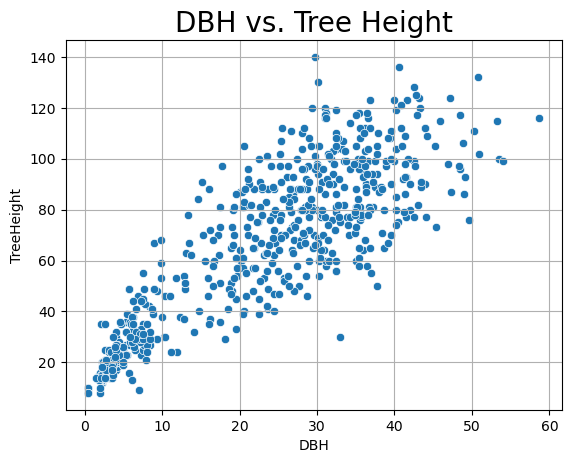

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # alias is plt
%matplotlib inline
import seaborn as sns
#I have uploaded portland_park_trees previously but want a new code for the data
ptrees = pd.read_csv("portland_park_trees.csv", header=0)
ulmus = ptrees[ptrees["Genus"]=="Ulmus"]
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", data=ulmus)
axs.set_title("DBH vs. Tree Height", fontsize=20, color="#000000")
axs.grid(True)
plt.show(fig)

#### Graph 2.
##### Scatterplot for the genus 'Ulmus' according to DBH and 'Tree Height', coloured according to species of 'Ulmus'

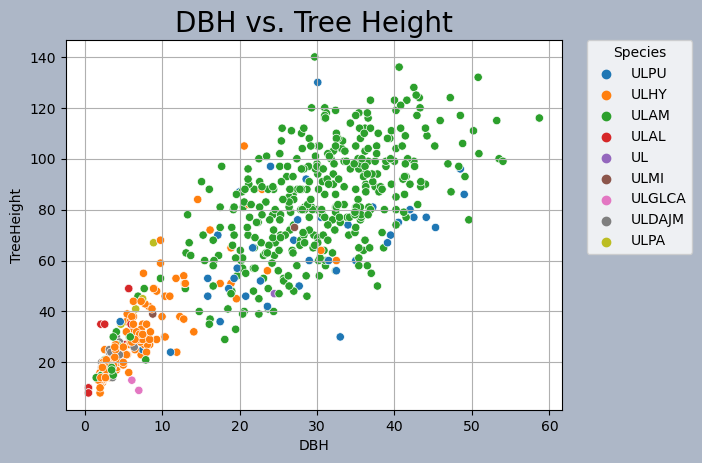

In [31]:
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", hue="Species", data=ulmus)
axs.set_title("DBH vs. Tree Height", fontsize=20, color="#000000")
handles, labels = axs.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Species')
axs.grid(True)
fig.patch.set_facecolor('#adb7c7')
plt.show(fig)

#### Graph 3.
##### A series of boxplots for the genus 'Ulmus', each boxplot shows a different species.